# Lab-4

Name: Purusharth Malik

Registration No.: 2348542

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import *

In [109]:
df = pd.read_csv('telecom_customer_churn.csv')
df

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,9992-RRAMN,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,9993-LHIEB,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


In [110]:
df.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

### Feature Selection and Preprocessing

In [111]:
# Dropping the unnecessary features
df = df.drop(['Churn Category','Churn Reason','Customer ID'],axis=1)

In [112]:
# Dropping features with null values
df = df.drop(df.isna().sum()[df.isna().sum()>0].index, axis=1)
df

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,...,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,...,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,...,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,La Mesa,91941,32.759327,-116.997260,0,13,...,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed
7039,Male,40,Yes,0,Riverbank,95367,37.734971,-120.954271,1,22,...,Month-to-Month,Yes,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned
7040,Male,22,No,0,Elk,95432,39.108252,-123.645121,0,2,...,Month-to-Month,Yes,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined
7041,Male,21,Yes,0,Solana Beach,92075,33.001813,-117.263628,5,67,...,Two Year,No,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed


In [113]:
# Separating numerical and categorical columns
df_num = df.select_dtypes('number')
df_cat = df.select_dtypes('object')

In [114]:
df_num

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,37,0,93225,34.827662,-118.999073,2,9,65.60,593.30,0.00,0,381.51,974.81
1,46,0,91206,34.162515,-118.203869,0,9,-4.00,542.40,38.33,10,96.21,610.28
2,50,0,92627,33.645672,-117.922613,0,4,73.90,280.85,0.00,0,134.60,415.45
3,78,0,94553,38.014457,-122.115432,1,13,98.00,1237.85,0.00,0,361.66,1599.51
4,75,0,93010,34.227846,-119.079903,3,3,83.90,267.40,0.00,0,22.14,289.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,20,0,91941,32.759327,-116.997260,0,13,55.15,742.90,0.00,0,606.84,1349.74
7039,40,0,95367,37.734971,-120.954271,1,22,85.10,1873.70,0.00,0,356.40,2230.10
7040,22,0,95432,39.108252,-123.645121,0,2,50.30,92.75,0.00,0,37.24,129.99
7041,21,0,92075,33.001813,-117.263628,5,67,67.85,4627.65,0.00,0,142.04,4769.69


In [115]:
df_cat

,Gender,Married,City,Phone Service,Internet Service,Contract,Paperless Billing,Payment Method,Customer Status
0,Female,Yes,Frazier Park,Yes,Yes,One Year,Yes,Credit Card,Stayed
1,Male,No,Glendale,Yes,Yes,Month-to-Month,No,Credit Card,Stayed
2,Male,No,Costa Mesa,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned
3,Male,Yes,Martinez,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned
4,Female,Yes,Camarillo,Yes,Yes,Month-to-Month,Yes,Credit Card,Churned
...,...,...,...,...,...,...,...,...,...
7038,Female,No,La Mesa,Yes,Yes,One Year,No,Credit Card,Stayed
7039,Male,Yes,Riverbank,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,Churned
7040,Male,No,Elk,Yes,Yes,Month-to-Month,Yes,Credit Card,Joined
7041,Male,Yes,Solana Beach,Yes,Yes,Two Year,No,Credit Card,Stayed


Lets see which of the categorical columns can be encoded.

In [116]:
[(x, df_cat[x].nunique()) for x in df_cat.columns]

[('Gender', 2),
 ('Married', 2),
 ('City', 1106),
 ('Phone Service', 2),
 ('Internet Service', 2),
 ('Contract', 3),
 ('Paperless Billing', 2),
 ('Payment Method', 3),
 ('Customer Status', 3)]

We will drop the 'City' column.

In [117]:
df_cat = df_cat.drop('City', axis=1)

In [118]:
# Separating the target column
y = df_cat['Customer Status']
df_cat.drop('Customer Status', axis=1, inplace=True)

In [119]:
# Encoding the categorical variables
df_cat = pd.get_dummies(df_cat, drop_first=True)
df_cat

,Gender_Male,Married_Yes,Phone Service_Yes,Internet Service_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check
0,False,True,True,True,True,False,True,True,False
1,True,False,True,True,False,False,False,True,False
2,True,False,True,True,False,False,True,False,False
3,True,True,True,True,False,False,True,False,False
4,False,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...
7038,False,False,True,True,True,False,False,True,False
7039,True,True,True,True,False,False,True,False,False
7040,True,False,True,True,False,False,True,True,False
7041,True,True,True,True,False,True,False,True,False


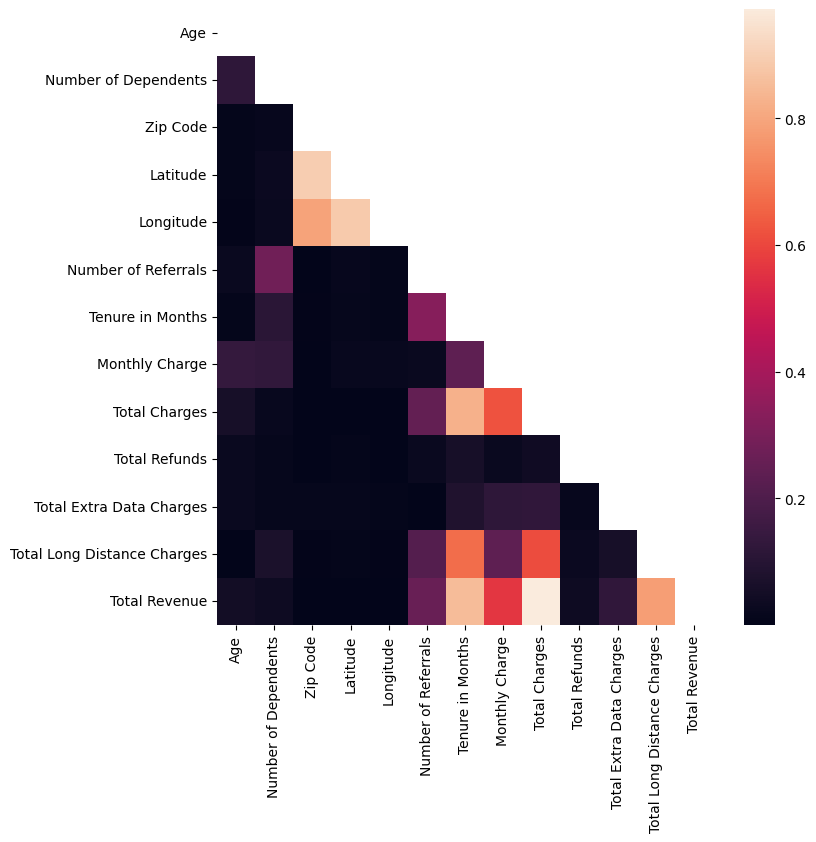

In [120]:
# Looking at the correlation b/w numerical columns
plt.figure(figsize=(8, 8))
sns.heatmap(df_num.corr().abs(), mask=np.triu(df_num.corr()))
plt.show()

We will drop `Monthly Charge` and `Total Long Distance Charges` as they are highly correlated with `Total Charges`.

We will also drop `Zipcode` and the positional information.

In [14]:
df_num.drop(['Monthly Charge', 'Total Long Distance Charges','Zip Code',
             'Latitude', 'Longitude'], axis=1, inplace=True)
df_num

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Total Charges,Total Refunds,Total Extra Data Charges,Total Revenue
0,37,0,2,9,593.30,0.00,0,974.81
1,46,0,0,9,542.40,38.33,10,610.28
2,50,0,0,4,280.85,0.00,0,415.45
3,78,0,1,13,1237.85,0.00,0,1599.51
4,75,0,3,3,267.40,0.00,0,289.54
...,...,...,...,...,...,...,...,...
7038,20,0,0,13,742.90,0.00,0,1349.74
7039,40,0,1,22,1873.70,0.00,0,2230.10
7040,22,0,0,2,92.75,0.00,0,129.99
7041,21,0,5,67,4627.65,0.00,0,4769.69


In [15]:
# Standardizing the numerical columns
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_num = pd.DataFrame(ss.fit_transform(df_num), columns = df_num.columns)
df_num

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Total Charges,Total Refunds,Total Extra Data Charges,Total Revenue
0,-0.567773,-0.486835,0.016039,-0.952994,-0.744500,-0.248313,-0.273300,-0.718872
1,-0.030433,-0.486835,-0.650409,-0.952994,-0.766962,4.602325,0.125055,-0.846108
2,0.208385,-0.486835,-0.650409,-1.156740,-0.882382,-0.248313,-0.273300,-0.914111
3,1.880110,-0.486835,-0.317185,-0.789997,-0.460063,-0.248313,-0.273300,-0.500827
4,1.700997,-0.486835,0.349263,-1.197489,-0.888318,-0.248313,-0.273300,-0.958059
...,...,...,...,...,...,...,...,...
7038,-1.582749,-0.486835,-0.650409,-0.789997,-0.678482,-0.248313,-0.273300,-0.588006
7039,-0.388660,-0.486835,-0.317185,-0.423253,-0.179466,-0.248313,-0.273300,-0.280726
7040,-1.463340,-0.486835,-0.650409,-1.238238,-0.965390,-0.248313,-0.273300,-1.013748
7041,-1.523045,-0.486835,1.015710,1.410464,1.035837,-0.248313,-0.273300,0.605693


In [16]:
# Concatenating the 2 dataframes 
X = pd.concat([df_num, df_cat], axis=1).values.astype('float32')

In [17]:
y.value_counts(normalize=True)

Customer Status
Stayed     0.670169
Churned    0.265370
Joined     0.064461
Name: proportion, dtype: float64

We will merge the `Stayed` and `Joined` status as we are only interested in the churning rate.

In [18]:
y[y == 'Joined'] = 'Stayed'

In [19]:
y.value_counts(normalize=True)

Customer Status
Stayed     0.73463
Churned    0.26537
Name: proportion, dtype: float64

There is some imbalance but we are hoping that our dropout layer will help regularize the network to still come up with a pretty decent generalization of the network.

In [20]:
# Encoding the target variable
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)
y

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

### Splitting the dataset into training, validation, and testing set

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.5,
                                                  stratify=y_train)

### Defining an architecture with Dropout

In [65]:
class DNNWithDropout(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense_1 = Dense(32, activation=tf.nn.relu, name='dense_1',
                             kernel_initializer='he_normal')
        self.dense_2 = Dense(64, activation=tf.nn.relu, name='dense_2',
                             kernel_initializer='he_normal')
        self.dense_3 = Dense(128, activation=tf.nn.relu, name='dense_3',
                             kernel_initializer='he_normal')
        self.dense_4 = Dense(64, activation=tf.nn.relu, name='dense_4',
                             kernel_initializer='he_normal')
        self.dense_5 = Dense(32, activation=tf.nn.relu, name='dense_5',
                             kernel_initializer='he_normal')
        self.dropout = Dropout(0.5)
        self.classifier = Dense(2, activation=tf.nn.softmax, name='output')
    
    def call(self, input_tensor):
        x = self.dense_1(input_tensor)
        x = self.dropout(x)
        x = self.dense_2(x)
        x = self.dropout(x)
        x = self.dense_3(x)
        x = self.dropout(x)
        x = self.dense_4(x)
        x = self.dropout(x)
        x = self.dense_5(x)
        return self.classifier(x)
    
# Instantiating the model
model = DNNWithDropout()

# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=tf.keras.metrics.CategoricalAccuracy())

# Fitting the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=16)

Epoch 1/100
155/155 [==============================] - 3s 6ms/step - loss: 0.8165 - categorical_accuracy: 0.6641 - val_loss: 0.6178 - val_categorical_accuracy: 0.7327
Epoch 2/100
155/155 [==============================] - 1s 4ms/step - loss: 0.6148 - categorical_accuracy: 0.7006 - val_loss: 0.6277 - val_categorical_accuracy: 0.7347
Epoch 3/100
155/155 [==============================] - 1s 4ms/step - loss: 0.5824 - categorical_accuracy: 0.7294 - val_loss: 0.5871 - val_categorical_accuracy: 0.7347
Epoch 4/100
155/155 [==============================] - 1s 4ms/step - loss: 0.5531 - categorical_accuracy: 0.7327 - val_loss: 0.5633 - val_categorical_accuracy: 0.7347
Epoch 5/100
155/155 [==============================] - 1s 4ms/step - loss: 0.5370 - categorical_accuracy: 0.7306 - val_loss: 0.5512 - val_categorical_accuracy: 0.7351
Epoch 6/100
155/155 [==============================] - 1s 4ms/step - loss: 0.5180 - categorical_accuracy: 0.7327 - val_loss: 0.5452 - val_categorical_accuracy: 0.733

Epoch 50/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3579 - categorical_accuracy: 0.8361 - val_loss: 0.4099 - val_categorical_accuracy: 0.8150
Epoch 51/100
155/155 [==============================] - 1s 5ms/step - loss: 0.3600 - categorical_accuracy: 0.8316 - val_loss: 0.4141 - val_categorical_accuracy: 0.8170
Epoch 52/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3721 - categorical_accuracy: 0.8349 - val_loss: 0.4254 - val_categorical_accuracy: 0.8110
Epoch 53/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3655 - categorical_accuracy: 0.8276 - val_loss: 0.4396 - val_categorical_accuracy: 0.8114
Epoch 54/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3611 - categorical_accuracy: 0.8325 - val_loss: 0.4203 - val_categorical_accuracy: 0.8166
Epoch 55/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3561 - categorical_accuracy: 0.8410 - val_loss: 0.4224 - val_categorical_accuracy:

Epoch 99/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3393 - categorical_accuracy: 0.8531 - val_loss: 0.4323 - val_categorical_accuracy: 0.8166
Epoch 100/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3370 - categorical_accuracy: 0.8511 - val_loss: 0.4053 - val_categorical_accuracy: 0.8146


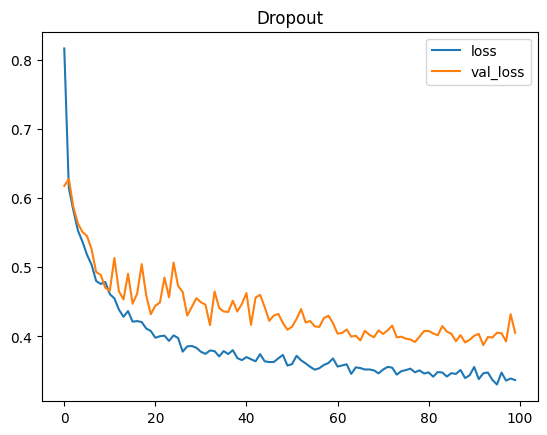

In [66]:
# Plotting the results
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Dropout')
plt.legend()
plt.show()

In [67]:
model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 2ms/step - loss: 0.3830 - categorical_accuracy: 0.8367


[0.3829910457134247, 0.8367250561714172]

We got an accuracy of about 83.6%.

### Layer-wise Dropout

In [68]:
class DNNWithLayerWiseDropout(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense_1 = Dense(32, activation=tf.nn.relu, name='dense_1',
                            kernel_initializer='he_normal')
        self.dense_2 = Dense(64, activation=tf.nn.relu, name='dense_2',
                            kernel_initializer='he_normal')
        self.dense_3 = Dense(128, activation=tf.nn.relu, name='dense_3',
                            kernel_initializer='he_normal')
        self.dense_4 = Dense(64, activation=tf.nn.relu, name='dense_4',
                            kernel_initializer='he_normal')
        self.dense_5 = Dense(32, activation=tf.nn.relu, name='dense_5',
                            kernel_initializer='he_normal')
        self.dropout_1 = Dropout(0.2)
        self.dropout_2 = Dropout(0.3)
        self.dropout_3 = Dropout(0.4)
        self.dropout_4 = Dropout(0.5)
        self.classifier = Dense(2, activation=tf.nn.softmax, name='output')
    
    def call(self, input_tensor):
        x = self.dense_1(input_tensor)
        x = self.dropout_4(x)
        x = self.dense_2(x)
        x = self.dropout_3(x)
        x = self.dense_3(x)
        x = self.dropout_2(x)
        x = self.dense_4(x)
        x = self.dropout_1(x)
        x = self.dense_5(x)
        return self.classifier(x)
    
# Instantiating the model
layer_model = DNNWithLayerWiseDropout()

# Compiling the model
layer_model.compile(optimizer=tf.keras.optimizers.Adam(),
                    loss=tf.keras.losses.CategoricalCrossentropy(),
                    metrics=tf.keras.metrics.CategoricalAccuracy())

# Fitting the model
layer_history = layer_model.fit(X_train, y_train,
                                validation_data=(X_val, y_val),
                                epochs=100,
                                batch_size=16)

Epoch 1/100
155/155 [==============================] - 3s 6ms/step - loss: 0.7190 - categorical_accuracy: 0.6783 - val_loss: 0.5786 - val_categorical_accuracy: 0.7302
Epoch 2/100
155/155 [==============================] - 1s 4ms/step - loss: 0.5548 - categorical_accuracy: 0.7217 - val_loss: 0.5531 - val_categorical_accuracy: 0.7132
Epoch 3/100
155/155 [==============================] - 1s 4ms/step - loss: 0.5446 - categorical_accuracy: 0.7274 - val_loss: 0.5379 - val_categorical_accuracy: 0.7278
Epoch 4/100
155/155 [==============================] - 1s 5ms/step - loss: 0.5314 - categorical_accuracy: 0.7205 - val_loss: 0.5145 - val_categorical_accuracy: 0.7400
Epoch 5/100
155/155 [==============================] - 1s 4ms/step - loss: 0.5023 - categorical_accuracy: 0.7375 - val_loss: 0.4848 - val_categorical_accuracy: 0.7509
Epoch 6/100
155/155 [==============================] - 1s 4ms/step - loss: 0.4995 - categorical_accuracy: 0.7408 - val_loss: 0.5092 - val_categorical_accuracy: 0.749

Epoch 50/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3548 - categorical_accuracy: 0.8450 - val_loss: 0.4011 - val_categorical_accuracy: 0.8154
Epoch 51/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3518 - categorical_accuracy: 0.8389 - val_loss: 0.3986 - val_categorical_accuracy: 0.8122
Epoch 52/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3520 - categorical_accuracy: 0.8410 - val_loss: 0.3808 - val_categorical_accuracy: 0.8300
Epoch 53/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3511 - categorical_accuracy: 0.8373 - val_loss: 0.3847 - val_categorical_accuracy: 0.8199
Epoch 54/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3498 - categorical_accuracy: 0.8406 - val_loss: 0.3883 - val_categorical_accuracy: 0.8170
Epoch 55/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3606 - categorical_accuracy: 0.8349 - val_loss: 0.3861 - val_categorical_accuracy:

Epoch 99/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3361 - categorical_accuracy: 0.8503 - val_loss: 0.3857 - val_categorical_accuracy: 0.8154
Epoch 100/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3420 - categorical_accuracy: 0.8479 - val_loss: 0.3865 - val_categorical_accuracy: 0.8195


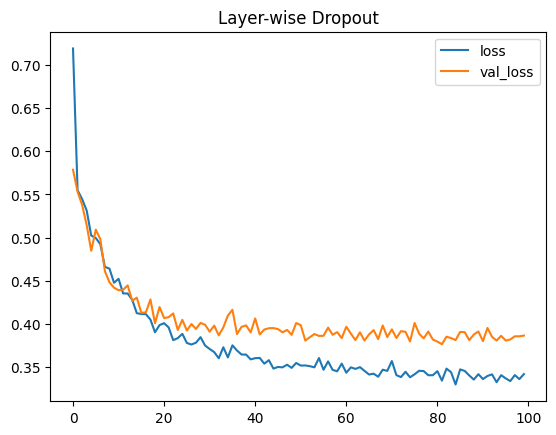

In [69]:
# Plotting the results
plt.plot(layer_history.history['loss'], label='loss')
plt.plot(layer_history.history['val_loss'], label='val_loss')
plt.title('Layer-wise Dropout')
plt.legend()
plt.show()

In [70]:
layer_model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 2ms/step - loss: 0.3628 - categorical_accuracy: 0.8372


[0.362791508436203, 0.8371983170509338]

There is a slight improvement in performance i.e., accuracy is now 83.7%.

### Monte Carlo Dropout

In [103]:
class MCDropout(Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)
    
class DNNWithMCDropout(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.dense_1 = Dense(32, activation=tf.nn.relu, name='dense_1',
                            kernel_initializer='he_normal')
        self.dense_2 = Dense(64, activation=tf.nn.relu, name='dense_2',
                            kernel_initializer='he_normal')
        self.dense_3 = Dense(128, activation=tf.nn.relu, name='dense_3',
                            kernel_initializer='he_normal')
        self.dense_4 = Dense(64, activation=tf.nn.relu, name='dense_4',
                            kernel_initializer='he_normal')
        self.dense_5 = Dense(32, activation=tf.nn.relu, name='dense_5',
                            kernel_initializer='he_normal')
        self.dropout_1 = MCDropout(0.1)
        self.dropout_2 = MCDropout(0.1)
        self.dropout_3 = MCDropout(0.1)
        self.classifier = Dense(2, activation=tf.nn.softmax, name='output')
    
    def call(self, input_tensor):
        x = self.dense_1(input_tensor)
        x = self.dense_2(x)
        x = self.dropout_1(x)
        x = self.dense_3(x)
        x = self.dropout_2(x)
        x = self.dense_4(x)
        x = self.dropout_3(x)
        x = self.dense_5(x)
        return self.classifier(x)
    
# Instantiating the model
mc_model = DNNWithMCDropout()

# Compiling the model
mc_model.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss=tf.keras.losses.CategoricalCrossentropy(),
                 metrics=tf.keras.metrics.CategoricalAccuracy())

# Fitting the model
mc_history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=100,
                        batch_size=16)

Epoch 1/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3027 - categorical_accuracy: 0.8682 - val_loss: 1.2330 - val_categorical_accuracy: 0.8097
Epoch 2/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3064 - categorical_accuracy: 0.8617 - val_loss: 1.1768 - val_categorical_accuracy: 0.8073
Epoch 3/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3040 - categorical_accuracy: 0.8637 - val_loss: 1.2175 - val_categorical_accuracy: 0.8077
Epoch 4/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3011 - categorical_accuracy: 0.8677 - val_loss: 1.1380 - val_categorical_accuracy: 0.8085
Epoch 5/100
155/155 [==============================] - 1s 5ms/step - loss: 0.3031 - categorical_accuracy: 0.8645 - val_loss: 1.2982 - val_categorical_accuracy: 0.8065
Epoch 6/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3039 - categorical_accuracy: 0.8629 - val_loss: 1.2611 - val_categorical_accuracy: 0.810

Epoch 50/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3054 - categorical_accuracy: 0.8629 - val_loss: 0.9872 - val_categorical_accuracy: 0.8126
Epoch 51/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3024 - categorical_accuracy: 0.8604 - val_loss: 0.9468 - val_categorical_accuracy: 0.8097
Epoch 52/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3072 - categorical_accuracy: 0.8613 - val_loss: 1.0381 - val_categorical_accuracy: 0.8032
Epoch 53/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3086 - categorical_accuracy: 0.8544 - val_loss: 1.0046 - val_categorical_accuracy: 0.8134
Epoch 54/100
155/155 [==============================] - 1s 4ms/step - loss: 0.2934 - categorical_accuracy: 0.8706 - val_loss: 1.1091 - val_categorical_accuracy: 0.8126
Epoch 55/100
155/155 [==============================] - 1s 4ms/step - loss: 0.2929 - categorical_accuracy: 0.8645 - val_loss: 1.1931 - val_categorical_accuracy:

Epoch 99/100
155/155 [==============================] - 1s 4ms/step - loss: 0.2982 - categorical_accuracy: 0.8609 - val_loss: 1.2464 - val_categorical_accuracy: 0.8101
Epoch 100/100
155/155 [==============================] - 1s 4ms/step - loss: 0.3065 - categorical_accuracy: 0.8621 - val_loss: 1.0865 - val_categorical_accuracy: 0.8089


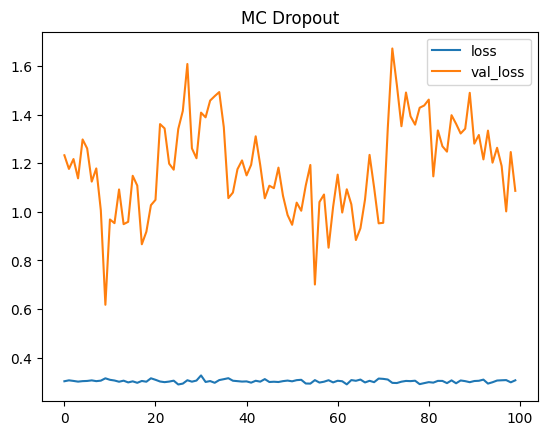

In [104]:
# Plotting the results
plt.plot(mc_history.history['loss'], label='loss')
plt.plot(mc_history.history['val_loss'], label='val_loss')
plt.title('MC Dropout')
plt.legend()
plt.show()

In [105]:
mc_model.evaluate(X_test, y_test)

67/67 [==============================] - 1s 3ms/step - loss: 0.8585 - categorical_accuracy: 0.4217


[0.8585137724876404, 0.42167535424232483]

### Comparision

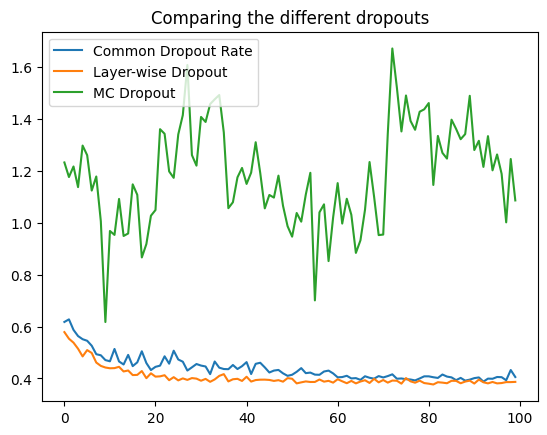

In [106]:
plt.plot(history.history['val_loss'], label='Common Dropout Rate')
plt.plot(layer_history.history['val_loss'], label='Layer-wise Dropout')
plt.plot(mc_history.history['val_loss'], label='MC Dropout')
plt.legend()
plt.title('Comparing the different dropouts')
plt.show()

While MC Dropout helps in uncertainity estimation of the model, it can clearly be seen here that it is not always suitable i.e., one should not blindly go for MC Dropout unless they really understand the usage of it.

# End